In [33]:
import pandas as pd
df = pd.read_csv("/home/aayush/accelerometer/accprocess/results/P037-timeSeries.csv.gz")


In [34]:
activities = df[df.columns.values.tolist()[2:6]]
out = activities[activities==1].idxmax(axis=1)
df["activity_predicted"] = out
df_cleaned = df.dropna(subset=["activity_predicted"])
print(len(df))
print(df_cleaned["activity_predicted"])

3300
0       sleep
1       sleep
2       sleep
3       sleep
4       sleep
        ...  
3295    sleep
3296    sleep
3297    sleep
3298    sleep
3299    sleep
Name: activity_predicted, Length: 3174, dtype: object


/tmp/ipykernel_313419/2807184091.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  out = activities[activities==1].idxmax(axis=1)


In [35]:
import csv
labels_dict = {}
with open("/home/aayush/accelerometer/accprocess/anno-label.csv", "r") as annotation_dict:
    reader = csv.DictReader(annotation_dict)
    for row in reader:
        if labels_dict.get(row['annotation']) is None:
            labels_dict[row['annotation']] = [row['label:Walmsley2020']]
        else:
            labels_dict[row['annotation']].append(row['label:Walmsley2020'])

In [36]:
annotated_data = pd.read_csv("/home/yacine/accel/capture24/participants/P037.csv")
actual_labels = annotated_data[["annotation", "time"]][0::3000]

/tmp/ipykernel_313419/1794720818.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv("/home/yacine/accel/capture24/participants/P037.csv")


In [37]:
print(actual_labels)
actual_labels.dropna(subset=["annotation"], inplace=True)
print(actual_labels)

                     annotation                        time
0        7030 sleeping;MET 0.95  2016-10-29 23:28:00.000000
3000     7030 sleeping;MET 0.95  2016-10-29 23:28:30.000000
6000     7030 sleeping;MET 0.95  2016-10-29 23:29:00.000000
9000     7030 sleeping;MET 0.95  2016-10-29 23:29:30.000000
12000    7030 sleeping;MET 0.95  2016-10-29 23:30:00.000000
...                         ...                         ...
9888000  7030 sleeping;MET 0.95  2016-10-31 02:56:00.000000
9891000  7030 sleeping;MET 0.95  2016-10-31 02:56:30.000000
9894000  7030 sleeping;MET 0.95  2016-10-31 02:57:00.000000
9897000  7030 sleeping;MET 0.95  2016-10-31 02:57:30.000000
9900000  7030 sleeping;MET 0.95  2016-10-31 02:58:00.000000

[3301 rows x 2 columns]
                     annotation                        time
0        7030 sleeping;MET 0.95  2016-10-29 23:28:00.000000
3000     7030 sleeping;MET 0.95  2016-10-29 23:28:30.000000
6000     7030 sleeping;MET 0.95  2016-10-29 23:29:00.000000
9000     7030 s

In [38]:
def parse_datetime(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

def parse_datetime_df_time(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    clean_datetime_str = clean_datetime_str.split('+')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

In [39]:
df_cleaned_time = df_cleaned['time'].apply(parse_datetime_df_time)
actual_time = actual_labels["time"].apply(parse_datetime)
actual_labels["time"] = actual_time

In [40]:
print(df_cleaned_time)
print(actual_time)

0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time, Length: 3174, dtype: datetime64[ns]
0         2016-10-29 23:28:00
3000      2016-10-29 23:28:30
6000      2016-10-29 23:29:00
9000      2016-10-29 23:29:30
12000     2016-10-29 23:30:00
                  ...        
9888000   2016-10-31 02:56:00
9891000   2016-10-31 02:56:30
9894000   2016-10-31 02:57:00
9897000   2016-10-31 02:57:30
9900000   2016-10-31 02:58:00
Name: time, Length: 2085, dtype: datetime64[ns]


In [41]:
actual_labels_filtered = actual_labels[actual_labels["time"].isin(df_cleaned_time)]
print(actual_labels_filtered)

                     annotation                time
360000   7030 sleeping;MET 0.95 2016-10-30 00:28:00
363000   7030 sleeping;MET 0.95 2016-10-30 00:28:30
366000   7030 sleeping;MET 0.95 2016-10-30 00:29:00
369000   7030 sleeping;MET 0.95 2016-10-30 00:29:30
372000   7030 sleeping;MET 0.95 2016-10-30 00:30:00
...                         ...                 ...
9885000  7030 sleeping;MET 0.95 2016-10-31 02:55:30
9888000  7030 sleeping;MET 0.95 2016-10-31 02:56:00
9891000  7030 sleeping;MET 0.95 2016-10-31 02:56:30
9894000  7030 sleeping;MET 0.95 2016-10-31 02:57:00
9897000  7030 sleeping;MET 0.95 2016-10-31 02:57:30

[1964 rows x 2 columns]


In [42]:
df_cleaned['time_cleaned'] = df_cleaned_time
print(df_cleaned['time_cleaned'])
df_cleaned_filtered = df_cleaned[df_cleaned['time_cleaned'].isin(actual_labels_filtered["time"])]
print(df_cleaned_filtered['time_cleaned'])

print(df_cleaned_filtered[df_cleaned_filtered['time_cleaned'].duplicated(keep=False)][['time_cleaned', 'activity_predicted']])
df_cleaned_filtered_dedup = df_cleaned_filtered[~df_cleaned_filtered['time_cleaned'].duplicated(keep='first')]
print(df_cleaned_filtered_dedup[['time_cleaned', 'activity_predicted']])

# from IPython.display import display
# with pd.option_context('display.max_rows', 300, 'display.max_columns', 10):
#     #some pandas stuff
#     print(df_cleaned_filtered[df_cleaned_filtered['time_cleaned'].duplicated(keep=False)][['time_cleaned', 'activity_predicted']].tail(200))

0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time_cleaned, Length: 3174, dtype: datetime64[ns]
0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time_cleaned, Length: 2084, dtype: datetime64[ns]
           time_cleaned activity_predicted
64  2016-10-30 01:00:00              sleep
65  2016-10-30 01:00:30              sleep
66  2016-10-30 01:01:00              sleep
67  2016-10-30 01:01:30              sleep
68  2016-10-30 01:02:00              sleep
..                  ...             

/tmp/ipykernel_313419/2063590338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time


In [43]:
flat_dict = {k: v[0] for k, v in labels_dict.items()}
actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)
actual_labels_cleaned = actual_labels_filtered.dropna(subset=['annotation'])
print(actual_labels_cleaned)


        annotation                time
360000       sleep 2016-10-30 00:28:00
363000       sleep 2016-10-30 00:28:30
366000       sleep 2016-10-30 00:29:00
369000       sleep 2016-10-30 00:29:30
372000       sleep 2016-10-30 00:30:00
...            ...                 ...
9885000      sleep 2016-10-31 02:55:30
9888000      sleep 2016-10-31 02:56:00
9891000      sleep 2016-10-31 02:56:30
9894000      sleep 2016-10-31 02:57:00
9897000      sleep 2016-10-31 02:57:30

[1964 rows x 2 columns]


/tmp/ipykernel_313419/1753659332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)
/tmp/ipykernel_313419/1753659332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)


In [44]:
print(actual_labels_cleaned[['time', 'annotation']])
print(df_cleaned_filtered_dedup[['time_cleaned', 'activity_predicted']])

                       time annotation
360000  2016-10-30 00:28:00      sleep
363000  2016-10-30 00:28:30      sleep
366000  2016-10-30 00:29:00      sleep
369000  2016-10-30 00:29:30      sleep
372000  2016-10-30 00:30:00      sleep
...                     ...        ...
9885000 2016-10-31 02:55:30      sleep
9888000 2016-10-31 02:56:00      sleep
9891000 2016-10-31 02:56:30      sleep
9894000 2016-10-31 02:57:00      sleep
9897000 2016-10-31 02:57:30      sleep

[1964 rows x 2 columns]
            time_cleaned activity_predicted
0    2016-10-30 00:28:00              sleep
1    2016-10-30 00:28:30              sleep
2    2016-10-30 00:29:00              sleep
3    2016-10-30 00:29:30              sleep
4    2016-10-30 00:30:00              sleep
...                  ...                ...
3295 2016-10-31 02:55:30              sleep
3296 2016-10-31 02:56:00              sleep
3297 2016-10-31 02:56:30              sleep
3298 2016-10-31 02:57:00              sleep
3299 2016-10-31 02:57:3

['sleep' 'light' 'sedentary' 'moderate-vigorous']
['sleep' 'sedentary' 'light' 'moderate-vigorous']


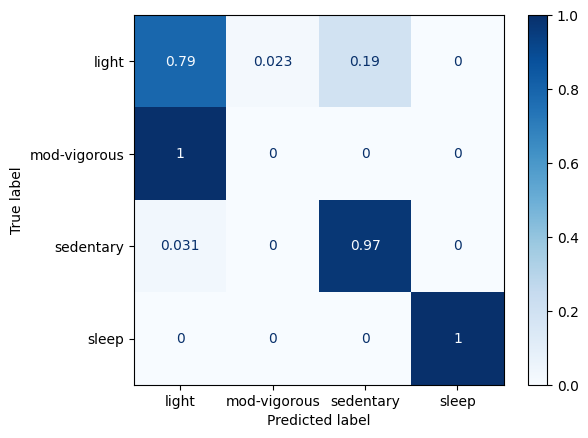

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
assert len(actual_labels_cleaned) == len(df_cleaned_filtered_dedup), "DataFrames must be of the same length"

true_labels = actual_labels_cleaned['annotation']
predicted_labels = df_cleaned_filtered_dedup['activity_predicted']

print(true_labels.unique())
print(predicted_labels.unique())

# Generate confusion matrix

cm = confusion_matrix(true_labels, predicted_labels, labels=['light', 'moderate-vigorous', 'sedentary', 'sleep'])

# Normalize by true values
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

import matplotlib.pyplot as plt

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['light', 'mod-vigorous', 'sedentary', 'sleep'])
disp.plot(cmap='Blues')  # You can change the color map as needed
plt.savefig("test.png")
